#Planning

**Qadam-**1: Ma'lumotlarni yig'ish va tushunish

1.   Kutubxonalarni chaqirish
2.   Ma'lumotlarni chaqirish
3.   Dataset haqida boshlang'ich tushunchalarni paydo qilish
4.   Datasetdagi xatoliklarni aniqlash. Va ularni vizualizatsiya uchun tayyorlash
<br>
<br>
**Qadam-2**: Vizualisatsiya qismi. Foydalaniladigan grafiklar:


*   Barplot
*   Histplot
*   Piechart
<br>
<br>

**Qadam-3**: Datasetni Machine Learning uchun tayyorlash


1.  Pipeline quramiz   
2.  Pipelineni train va test datasetlar uchun transform qilamiz
<br>
<br>
**Qadam-4**: Machine Learning

1.   Qanday Machine Learning algoritmini tanlaymiz:
      *   Logistic Regression
      *   Decision Trees
      *   Random Forest
      *   Support Vector Machines (SVM)
      *   Naive Bayes:
      *   Gradient Boosting
      *   Neural Networks (Deep Learning)


2.   Har bir algoritm uchun trainsetni o'qitamiz
<br>
<br>
**Qadam-5**: Modelni baholash


*   Confusion Matrix
*   Classification Report
<br>
<br>

**Qadam-6**: Test setni barcha modellar yordamida predict qilamiz
*   Test setlarni bashorat qilish
*   Yangi DataFrame yaratamiz va barcha bashorat qilingan qiymatlarni shu DataFramining ustunlari qilib joylashtiramiz  







#Required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

#Kerakli kutubxonalarni yuklash

#Data Collecting and Understanding

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jamshid-ds/Bank-Term-Deposit-Predictions/main/dataset/train.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

Dataset 45 mingdan ko'proq qatorga ega. Va 17 ustun mavjud:
<br>
<br><br>

`age`: mijozning yoshi.
<br>
<br>
`job`: mijozning kasbi.
<br>
<br>
`marital`: mijozning oilaviy holati.
<br>
<br>
`education`: mijozning ta'lim darajasi.
<br>
<br>
`default`: mijozning ayni paytdagi krediti bor yoki yo'qligi.
<br>
<br>
`balance`: mijoz hisobidagi qoldiq.
<br>
<br>
`housing`: mijozning uy-joy krediti bor yoki yo'qligi.
<br>
<br>
`contact`: mijoz bilan bog'lanish uchun ishlatiladigan usul (masalan, telefon, uyali).
<br>
<br>
`day`: mijozlar bilan oxirgi aloqa o'rnatilgan oyning kuni.
<br>
<br>
`duration`: Kampaniya davomida mijozlar bilan oxirgi aloqaning davomiyligi (sekundlarda).
<br>
<br>
`campaign`: har bir mijoz uchun ushbu kampaniya davomida amalga oshirilgan kontaktlar soni
<br>
<br>
`pdays` : oldingi aloqada bo'lgan kundan boshlab o'tgan kunlar soni oldingi kampaniya
<br>
<br>
`poutcome` : oldingi marketing kampaniyasi natijasi


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Yuqoridagi outputda shu ko'rinib turibdiki: non-null qiymatlar datasetning qatorlar soni bilan teng. Demak bizda nan qiymatlar mavjud emas. Bu esa datasetning anchagina sifatli ekanligini bildiradi

In [ ]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
5682,36,technician,married,secondary,no,-8,yes,no,unknown,26,may,180,2,-1,0,unknown,no
31650,40,management,married,secondary,no,754,no,yes,cellular,6,apr,635,1,-1,0,unknown,yes
32274,25,blue-collar,single,unknown,no,431,yes,no,cellular,16,apr,493,1,317,12,failure,no
30182,34,services,single,primary,no,496,yes,no,cellular,5,feb,173,1,-1,0,unknown,no
3180,32,management,single,tertiary,no,0,yes,no,unknown,15,may,86,4,-1,0,unknown,no
32077,43,blue-collar,married,primary,no,2273,yes,no,cellular,14,apr,424,2,147,3,failure,no
30914,38,management,married,secondary,no,844,no,no,cellular,9,feb,12,7,-1,0,unknown,no
42937,56,admin.,married,unknown,no,2038,no,no,cellular,8,feb,405,1,305,1,success,no
3857,32,blue-collar,single,primary,no,100,yes,no,unknown,16,may,376,2,-1,0,unknown,no
1658,32,housemaid,married,primary,no,344,yes,no,unknown,9,may,85,2,-1,0,unknown,no


In [ ]:
df.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [ ]:
df.y = df.y.replace("no",0).replace("yes",1)
df.marital = df.marital.replace("married",1).replace('single',0).replace('divorced',2)
df.default = df.default.replace(['no','yes'],[0,1])
df.housing = df.housing.replace(['no','yes'],[0,1])
df.laon = df.loan.replace(['no','yes'],[0,1])


#Barcha Yes yoki No dan tashkil topgan ustunlarni 1 yoki 0 ga tenglashtirib olamiz

<ipython-input-8-01ad837f59f9>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.laon = df.loan.replace(['no','yes'],[0,1])


In [ ]:
df.describe()

,age,marital,default,balance,housing,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.832275,0.018027,1362.272058,0.555838,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.608230,0.133049,3044.765829,0.496878,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,0.000000,-8019.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,72.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,1.000000,0.000000,448.000000,1.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1.000000,0.000000,1428.000000,1.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,2.000000,1.000000,102127.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [ ]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

<ipython-input-10-f0053e680f59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


,age,marital,default,balance,housing,day,duration,campaign,pdays,previous,y
age,1.000000,0.403240,0.017879,0.097783,0.185513,0.009120,0.004648,0.004760,0.023758,0.001288,0.025155
marital,0.403240,1.000000,0.007023,0.002122,0.016096,0.005261,0.011852,0.008994,0.019172,0.014973,0.045588
default,0.017879,0.007023,1.000000,0.066745,0.006025,0.009424,0.010021,0.016822,0.029979,0.018329,0.022419
balance,0.097783,0.002122,0.066745,1.000000,0.068768,0.004503,0.021560,0.014578,0.003435,0.016674,0.052838
housing,0.185513,0.016096,0.006025,0.068768,1.000000,0.027982,0.005075,0.023599,0.124178,0.037076,0.139173
day,0.009120,0.005261,0.009424,0.004503,0.027982,1.000000,0.030206,0.162490,0.093044,0.051710,0.028348
duration,0.004648,0.011852,0.010021,0.021560,0.005075,0.030206,1.000000,0.084570,0.001565,0.001203,0.394521
campaign,0.004760,0.008994,0.016822,0.014578,0.023599,0.162490,0.084570,1.000000,0.088628,0.032855,0.073172
pdays,0.023758,0.019172,0.029979,0.003435,0.124178,0.093044,0.001565,0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.014973,0.018329,0.016674,0.037076,0.051710,0.001203,0.032855,0.454820,1.000000,0.093236


Datasetdagi corrilatsiyalarni confusion matrix yordamida tekshiramiz

In [ ]:
df.corrwith(df['y']).abs().sort_values(ascending=False)

<ipython-input-11-77064b030b41>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['y']).abs().sort_values(ascending=False)


y           1.000000
duration    0.394521
housing     0.139173
pdays       0.103621
previous    0.093236
campaign    0.073172
balance     0.052838
marital     0.045588
day         0.028348
age         0.025155
default     0.022419
dtype: float64

Dataset yordamida boshlang'ich tushunchalarni yig'ib oldik.
<br>
<br>
Endi Vizualizatsiya Jarayoniga o'tamiz

#Visualization

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,0,2143,1,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,0,secondary,0,29,1,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,1,secondary,0,2,1,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,1,unknown,0,1506,1,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,unknown,0,1,0,no,unknown,5,may,198,1,-1,0,unknown,0


##Yosh taqsimoti

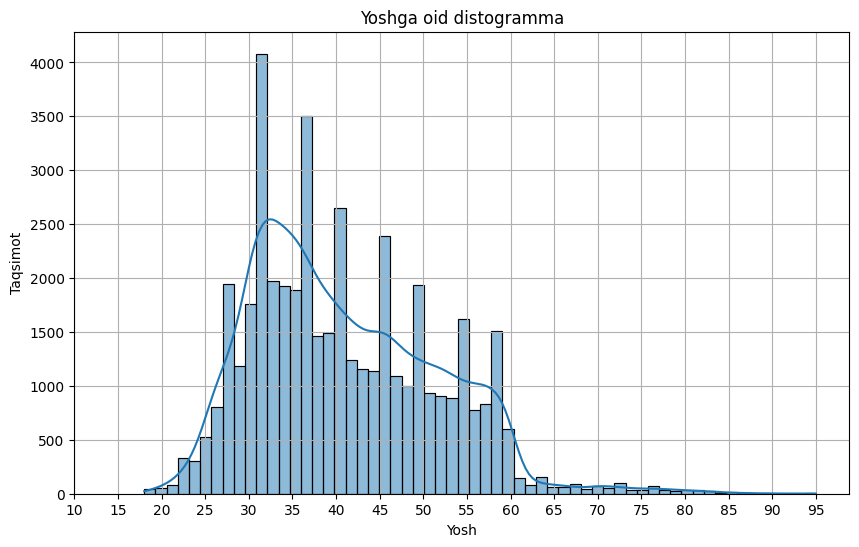

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(df['age'], bins=60, kde=True,)


plt.title('Yoshga oid distogramma')
plt.xlabel('Yosh')
plt.ylabel('Taqsimot')
plt.xticks([i for i in range(10, 100, 5)])
plt.grid()

plt.show()

Asosiy mijozlar 30-35 yoshlilar ekan

##Kasb holatini ifodalovchi grafik tuzamiz

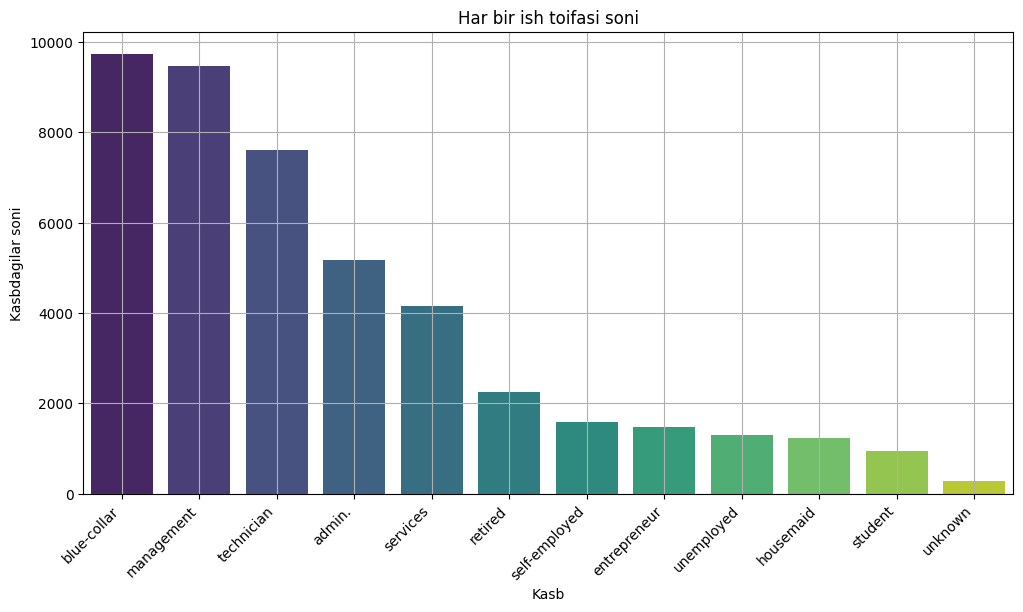

In [ ]:
job_counts = df['job'].value_counts()

plt.figure(figsize=(12, 6))

sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.grid()

plt.title('Har bir ish toifasi soni')
plt.xlabel('Kasb')
plt.ylabel('Kasbdagilar soni')
plt.xticks(rotation=45, ha='right')

plt.show()

`Blue-colar` tipidagi kasb egalari ko'p ekan

##Turmush holatini ifodalovchi grafik chizamiz

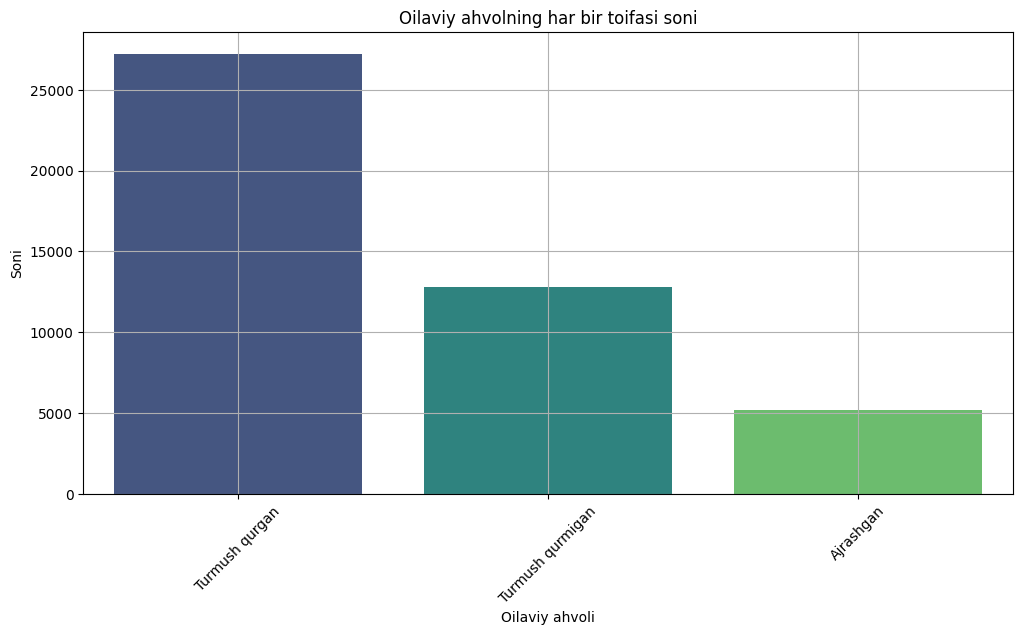

In [ ]:
marital_counts = df['marital'].value_counts()
plt.figure(figsize=(12, 6))

sns.barplot(x=['Turmush qurgan', "Turmush qurmigan","Ajrashgan"], y=marital_counts.values, palette='viridis')

plt.title('Oilaviy ahvolning har bir toifasi soni')
plt.xlabel('Oilaviy ahvoli')
plt.ylabel('Soni')
plt.grid()
plt.xticks(rotation=45)

plt.show()

##Ta'lim holatini ifodalovchi grafik chizamiz

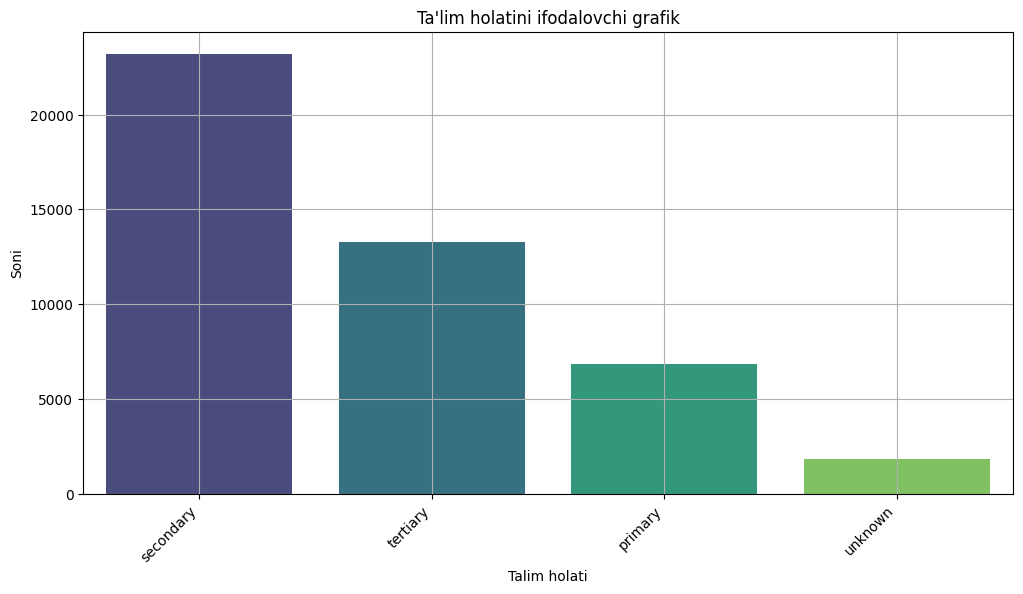

In [ ]:
e_count = df['education'].value_counts()

plt.figure(figsize=(12, 6))

sns.barplot(x=e_count.index, y=e_count.values, palette='viridis')
plt.grid()

plt.title("Ta'lim holatini ifodalovchi grafik")
plt.xlabel("Talim holati")
plt.ylabel('Soni')
plt.xticks(rotation=45, ha='right')

plt.show()

##Y ustunini ifodalovchi piechart

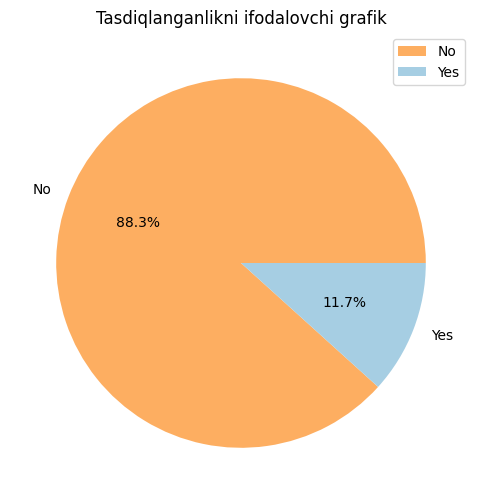

In [ ]:
plt.figure(figsize=(12, 6))
y_count = df['y'].value_counts()
plt.pie(x=y_count, labels=['No', 'Yes'], colors=['#fdae61', '#a6cee3'],autopct='%1.1f%%')
plt.legend()
plt.title("Tasdiqlanganlikni ifodalovchi grafik")
plt.show()


#Preparing the dataset for Machine Learning

##Save the test set to the `test` dataframe

In [ ]:
test = pd.read_csv("https://raw.githubusercontent.com/jamshid-ds/Bank-Term-Deposit-Predictions/main/dataset/test.csv")
test.sample(10)
#testsetni chaqirib olamiz

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
3157,75,blue-collar,married,secondary,no,6053,no,no,cellular,11,feb,865,2,190,1,failure,no
1701,29,unemployed,single,secondary,no,486,no,no,telephone,30,apr,95,1,-1,0,unknown,no
4098,30,technician,married,secondary,no,1211,yes,no,cellular,18,may,176,1,-1,0,unknown,no
3303,52,services,divorced,secondary,no,238,yes,no,cellular,6,may,101,1,362,5,other,no
2618,54,services,married,secondary,no,812,no,no,cellular,31,jul,113,6,-1,0,unknown,no
4226,37,blue-collar,married,secondary,no,395,yes,no,unknown,6,may,219,2,-1,0,unknown,no
4063,32,technician,married,secondary,no,485,no,no,cellular,26,aug,98,14,-1,0,unknown,no
2918,29,admin.,single,tertiary,no,14,no,no,cellular,29,sep,87,1,120,1,failure,no
2396,30,management,married,tertiary,no,877,no,no,cellular,13,aug,202,1,83,5,failure,no


Yuqoriroqda train set uchun ba'zi qiymatlarni o'zgartirgan edik. Shu amallarni test set uchun ham qilib olamiz

In [ ]:
test.y = test.y.replace("no",0).replace("yes",1)
test.marital = test.marital.replace("married",1).replace('single',0).replace('divorced',2)
test.default = test.default.replace(['no','yes'],[0,1])
test.housing = test.housing.replace(['no','yes'],[0,1])
test.laon = test.loan.replace(['no','yes'],[0,1])

<ipython-input-19-d9e16ff9ef25>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.laon = test.loan.replace(['no','yes'],[0,1])


In [ ]:
test.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Bizda hech qanday nan qiymat mavjud emas

##Splitting the train set into x and y

In [ ]:
x = df.drop('y',axis=1)
y = df['y']

##we distinguish numeric and string columns

In [ ]:
nums = []
cats = []

for h in list(x.columns):
  if df[h].dtype == 'int64':
    nums.append(h)
  else:
    cats.append(h)

#Agar ustun sonli bo'lsa nums listiga, agar aksincha bo'lsa cats ustuniga qo'shiladi

Object va sonli ustunlarni alohida (`nums` va `cats`) o'zgaruvchilariga saqlaymiz

##Pipeline

In [ ]:
#Sonli ustunlar uchun pipeline
nums_pipeline = Pipeline([
    ('st_scaler', StandardScaler()),
    ('minmaxscaler', MinMaxScaler())
])

#Satrli ustunlar uchun pipeline
cats_pipeline = Pipeline([
    ("O_Encoder", OrdinalEncoder())

])

#umumiy transformer
full_pipeline = ColumnTransformer([
    ('nums', nums_pipeline, nums),
    ('cats', cats_pipeline, cats),
])

Pipeline qurib olindi. Endi uni train va test setlar uchun transform qilamiz

In [ ]:
x_pre = full_pipeline.fit_transform(x)
test_pre = full_pipeline.transform(test)

# Train va test data larni tayyorlab oldik

In [ ]:
# x_pre
test_pre

array([[ 0.15584416,  0.5       ,  0.        , ...,  0.        ,
        10.        ,  3.        ],
       [ 0.19480519,  0.5       ,  0.        , ...,  0.        ,
         8.        ,  0.        ],
       [ 0.22077922,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.50649351,  0.5       ,  0.        , ...,  0.        ,
         1.        ,  3.        ],
       [ 0.12987013,  0.5       ,  0.        , ...,  0.        ,
         3.        ,  1.        ],
       [ 0.33766234,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

#Machine Learning

##Barcha ishlatmoqchi bo'lgan modellarni chaqirib olamiz

In [ ]:
#Logistic Regression
logreg_model = LogisticRegression()

#DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

#RandomForestClassifier
rf_model = RandomForestClassifier()

#Support Vector Machines (SVM)
svm_model = SVC()

#Naive Bayes:
GNB_model = GaussianNB()

#Gradient Boosting
GB_model = GradientBoostingClassifier()

#Neural Networks (Deep Learning)
dl_model = MLPClassifier()

##Modellarni o'qitamiz

In [ ]:
logreg_model.fit(x_pre,y)
dt_model.fit(x_pre,y)
rf_model.fit(x_pre,y)
svm_model.fit(x_pre,y)
GNB_model.fit(x_pre,y)
GB_model.fit(x_pre,y)
dl_model.fit(x_pre,y)

#Modellarni o'qitib olamiz

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLPClassifier()

##O'qitilgan modellar yordamida train datasetimizining qiymatlarini predict qilamiz va har bir model qaytargan javoblarni yangi dataframega yuklaymiz

In [ ]:
df_pred = pd.DataFrame()
df_pred['Logistic Regression'] = logreg_model.predict(x_pre)
df_pred['Decision Tree'] = dt_model.predict(x_pre)
df_pred['Random Forest'] = rf_model.predict(x_pre)
df_pred['SVM'] = svm_model.predict(x_pre)
df_pred['Naive Bayes'] = GNB_model.predict(x_pre)
df_pred['Gradient Boosting'] = GB_model.predict(x_pre)
df_pred['Deep Learning'] = dl_model.predict(x_pre)


#Model evaluation

In [ ]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(confusion_matrix(df_pred['REAL'], df_pred['Logistic Regression']), annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Class')
# plt.ylabel('True Class')
# plt.title('Confusion Matrix for Logistic Regression')
# plt.show()

# # Confusion Matrix for Decision Tree
# plt.figure(figsize=(12, 8))
# sns.heatmap(confusion_matrix(df_pred['REAL'], df_pred['Decision Tree']), annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Class')
# plt.ylabel('True Class')
# plt.title('Confusion Matrix for Decision Tree')
# plt.show()

# # Confusion Matrix for Random Forest
# plt.figure(figsize=(12, 8))
# sns.heatmap(confusion_matrix(df_pred['REAL'], df_pred['Random Forest']), annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Class')
# plt.ylabel('True Class')
# plt.title('Confusion Matrix for Random Forest')
# plt.show()

# # Confusion Matrix for SVM
# plt.figure(figsize=(12, 8))
# sns.heatmap(confusion_matrix(df_pred['REAL'], df_pred['SVM']), annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Class')
# plt.ylabel('True Class')
# plt.title('Confusion Matrix for SVM')
# plt.show()

# # Confusion Matrix for Naive Bayes
# plt.figure(figsize=(12, 8))
# sns.heatmap(confusion_matrix(df_pred['REAL'], df_pred['Naive Bayes']), annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Class')
# plt.ylabel('True Class')
# plt.title('Confusion Matrix for Naive Bayes')
# plt.show()

# # Confusion Matrix for Gradient Boosting
# plt.figure(figsize=(12, 8))
# sns.heatmap(confusion_matrix(df_pred['REAL'], df_pred['Gradient Boosting']), annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Class')
# plt.ylabel('True Class')
# plt.title('Confusion Matrix for Gradient Boosting')
# plt.show()

# # Confusion Matrix for Deep Learning
# plt.figure(figsize=(12, 8))
# sns.heatmap(confusion_matrix(df_pred['REAL'], df_pred['Deep Learning']), annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Class')
# plt.ylabel('True Class')
# plt.title('Confusion Matrix for Deep Learning')
# plt.show()


Bizda Random Forest Va Decision Tree modellari Train set uchun ancha yaxshi natija qayd etdi

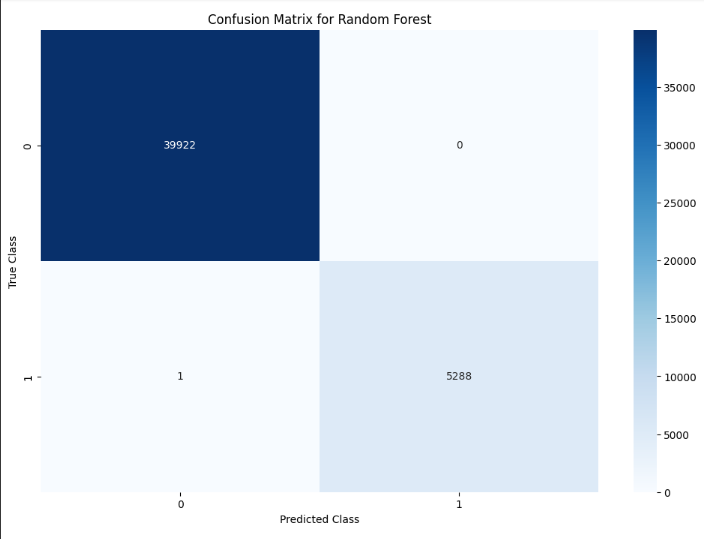



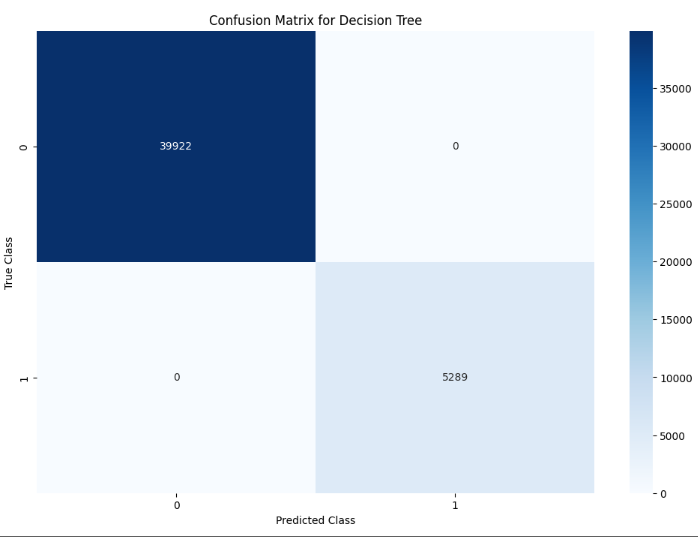

#Predicting the test set using all models

In [ ]:
log_reg_pre = logreg_model.predict(test_pre)
dt_model_pre = dt_model.predict(test_pre)
rf_model_pre = rf_model.predict(test_pre)
svc_pre = svm_model.predict(test_pre)
GNB_model_pre = GNB_model.predict(test_pre)
GB_model_pre = GB_model.predict(test_pre)
dl_pre = dl_model.predict(test_pre)

In [ ]:
pre_df = pd.DataFrame()
pre_df['Log_reg'] = log_reg_pre
pre_df['Decision Tree'] = dt_model_pre
pre_df['Random Forest'] = rf_model_pre
pre_df['SVM'] = svc_pre
pre_df['Gaussian Naive Bayes'] = GNB_model_pre
pre_df['Gradient Boosting'] = GB_model_pre
pre_df['Deep Learning'] = dl_pre


In [ ]:
pre_df

,Log_reg,Decision Tree,Random Forest,SVM,Gaussian Naive Bayes,Gradient Boosting,Deep Learning
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
4516,0,0,0,0,0,0,0
4517,0,0,0,0,0,0,0
4518,0,0,0,0,0,0,0
4519,0,0,0,0,0,0,0


#Saving DataFrames

In [ ]:
pre_df.to_csv('Predicted_df_test_data.csv',index=False)
df_pred.to_csv("Predicted_df_train_data.csv",index=False)